In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from functools import reduce

In [141]:
dfs = {}
year = [1980,1984,1989,1991,1996,1998,1999,2004,2009,2014,2019,2024]
for i in year:
    dfs[i] = pd.read_csv(f'/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data-backup/{i}-backup-data.csv')

In [142]:
col_year_dict = {}
for i in year:
    col_list = []
    for col in dfs[i].columns:
        col_list.append(col)
    col_year_dict[i] = col_list
for i in year:
    print(col_year_dict[i][:5])

['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'No', 'Name', 'Type']
['Unnamed: 0', 'State', 'Name', 'Type', 'Candidate']
['Unnamed: 0', 'Name', 'Type', 'Winning Candidate', 'Winning Party']


In [143]:
for i in year:
    dfs[i] = dfs[i][dfs[i].columns[1:]]

## Year Wise Party Performance

In [144]:
year_wise_performance = {}
for i in year: 
   performance = dfs[i].groupby('Winning Party')['Winning Party'].count().sort_values(ascending = False).to_dict()
   year_wise_performance[i] = performance
party_wise_performance_yearly = pd.DataFrame(year_wise_performance)
party_wise_performance_yearly.fillna(0,inplace=True)

In [145]:
party_wise_performance_yearly_t = party_wise_performance_yearly.transpose()
party_wise_performance_yearly_t.to_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/yearly_party_performance.csv')

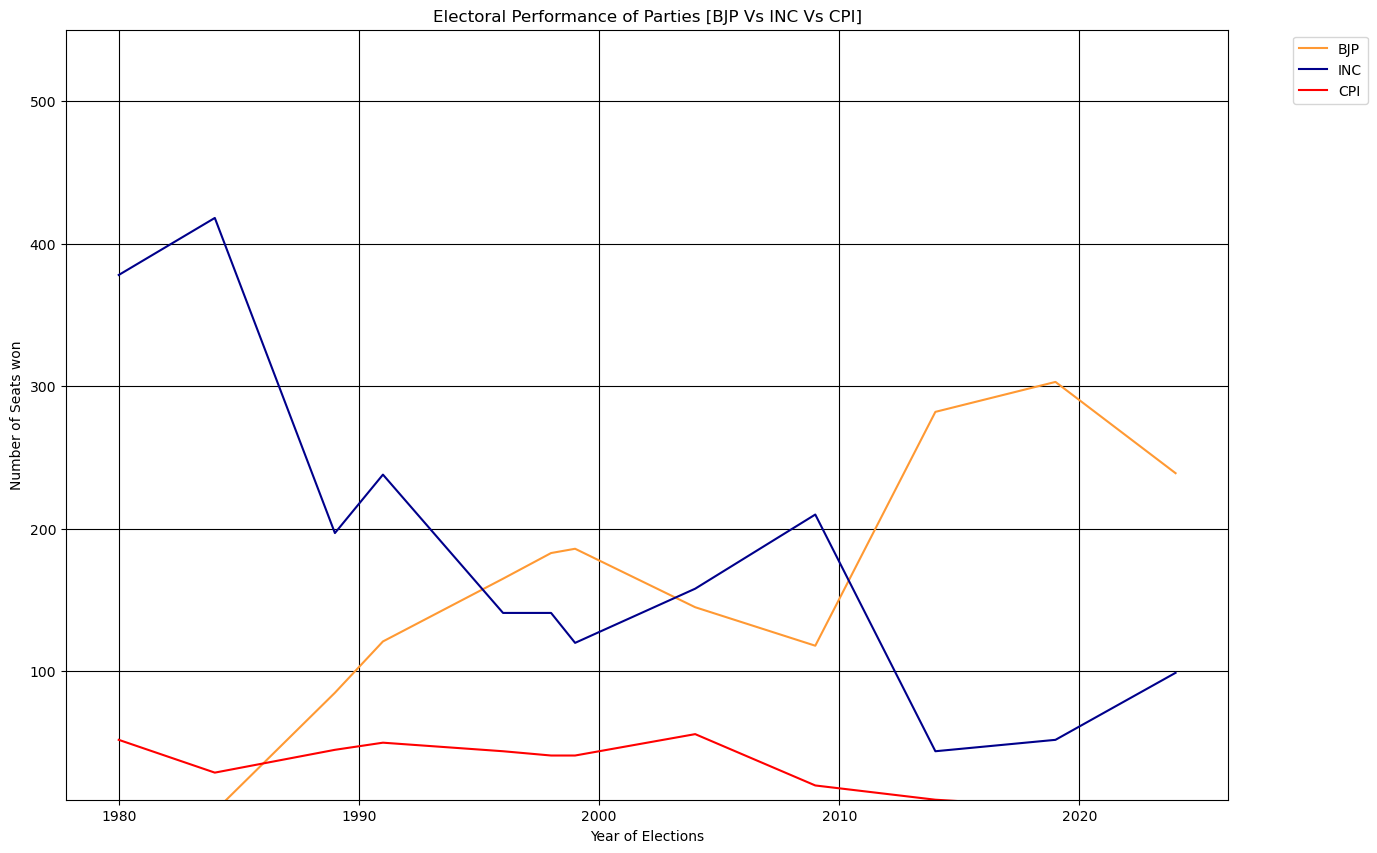

In [146]:
rcParams['figure.figsize'] = 15,6
fig, ax = plt.subplots(figsize=(15, 10)) 
plt.plot(party_wise_performance_yearly_t['BJP'], color = '#ff9933')
plt.plot(party_wise_performance_yearly_t['INC'], color = '#00008b')
plt.plot(party_wise_performance_yearly_t['CPI'], color = '#ff0000')
plt.grid(True, color = 'k', linestyle = '-')
plt.ylim(10,550)
plt.xlabel('Year of Elections')
plt.ylabel('Number of Seats won')
plt.title('Electoral Performance of Parties [BJP Vs INC Vs CPI]')
plt.legend(['BJP', 'INC', 'CPI'], bbox_to_anchor=(1.05, 1), loc = "upper left");

In [147]:
## Replacing TMC(M) with AITC
filt = (dfs[2019]['State'] == 'West Bengal') & (dfs[2019]['Winning Party'] == 'TMC(M)')
dfs[2019]['Winning Party'].loc[filt] = dfs[2019]['Winning Party'].loc[filt].replace({'TMC(M)':'AITC'})

<span style="font-size:24px; font-weight:bold;">
    Constituency Volatility Index (CVI):
</span>
<span style="font-size:18px;">
    Number of times a constituency changed winning party over the years
</span>

In [ ]:
# # for i in year:
# #     dfs[i].loc[:,['Name', 'Winning Party', 'Year']]
# dfs[2014]['Year'] = 2014
# dfs[2019]['Year'] = 2019
# dfs[2024]['Year'] = 2024
# dfs[2019]['Year'].to_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data-backup/2019-backup-data.csv')
# dfs[2014]['Year'].to_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data-backup/2024-backup-data.csv')

In [161]:
dfs[2014].loc[:,['Name', 'Winning Party', 'Year','State']].merge(dfs[2019].loc[:,['Name', 'Winning Party', 'Year','State']], on = ['Name'], how = 'inner')

,Name,Winning Party_x,Year_x,State_x,Winning Party_y,Year_y,State_y
0,Araku,YSRCP,2014,Andhra Pradesh,YSRCP,2019,Andhra Pradesh
1,Srikakulam,TDP,2014,Andhra Pradesh,TDP,2019,Andhra Pradesh
2,Vizianagaram,TDP,2014,Andhra Pradesh,YSRCP,2019,Andhra Pradesh
3,Visakhapatnam,BJP,2014,Andhra Pradesh,YSRCP,2019,Andhra Pradesh
4,Anakapalli,TDP,2014,Andhra Pradesh,YSRCP,2019,Andhra Pradesh
...,...,...,...,...,...,...,...
511,Bardhaman Purba,AITC,2014,West Bengal,AITC,2019,West Bengal
512,Bardhaman-Durgapur,AITC,2014,West Bengal,BJP,2019,West Bengal
513,Asansol,BJP,2014,West Bengal,BJP,2019,West Bengal
514,Bolpur,AITC,2014,West Bengal,AITC,2019,West Bengal


In [172]:
year_1 = [1980,1984,1989,1991,1996,1998,1999,2004,2009]
year_2 = [2014,2019,2024]
keys  = ["State", "Name"]
cols  = ["State", "Name", "Winning Party", "Year"]

tables = []
for y in year_1:
    tmp = dfs[y][cols].copy()
    tmp = tmp.rename(columns={
        "Winning Party": f"Winner_{y}",   # unique per year
        "Year":          f"Year_{y}"
    })
    tables.append(tmp)

table_1 = reduce(
    lambda left, right: pd.merge(left, right, on=keys, how="inner"),
    tables
)

In [174]:
table_1.head(5)

,State,Name,Winner_1980,Year_1980,Winner_1984,Year_1984,Winner_1989,Year_1989,Winner_1991,Year_1991,Winner_1996,Year_1996,Winner_1998,Year_1998,Winner_1999,Year_1999,Winner_2004,Year_2004,Winner_2009,Year_2009
0,Andhra Pradesh,Srikakulam,INC,1980,TDP,1984,INC,1989,INC,1991,TDP,1996,TDP,1998,TDP,1999,TDP,2004,INC,2009
1,Andhra Pradesh,Visakhapatnam,INC,1980,TDP,1984,INC,1989,TDP,1991,INC,1996,INC,1998,TDP,1999,INC,2004,INC,2009
2,Andhra Pradesh,Anakapalli,INC,1980,TDP,1984,INC,1989,INC,1991,TDP,1996,INC,1998,TDP,1999,TDP,2004,INC,2009
3,Andhra Pradesh,Kakinada,INC,1980,TDP,1984,INC,1989,TDP,1991,TDP,1996,BJP,1998,TDP,1999,INC,2004,INC,2009
4,Andhra Pradesh,Rajahmundry,INC,1980,TDP,1984,INC,1989,TDP,1991,INC,1996,BJP,1998,BJP,1999,INC,2004,INC,2009


In [166]:
year_2 = [2014,2019,2024]
keys  = ["State", "Name"]
cols  = ["State", "Name", "Winning Party", "Year"]

tables = []
for y in year_2:
    tmp = dfs[y][cols].copy()
    tmp = tmp.rename(columns={
        "Winning Party": f"Winner_{y}",   # unique per year
        "Year":          f"Year_{y}"
    })
    tables.append(tmp)

table_2 = reduce(
    lambda left, right: pd.merge(left, right, on=keys, how="inner"),
    tables
)

In [175]:
table_2.head(5)

,State,Name,Winner_2014,Year_2014,Winner_2019,Year_2019,Winner_2024,Year_2024
0,Andhra Pradesh,Araku,YSRCP,2014,YSRCP,2019,YSRCP,2024
1,Andhra Pradesh,Srikakulam,TDP,2014,TDP,2019,TDP,2024
2,Andhra Pradesh,Vizianagaram,TDP,2014,YSRCP,2019,TDP,2024
3,Andhra Pradesh,Visakhapatnam,BJP,2014,YSRCP,2019,TDP,2024
4,Andhra Pradesh,Anakapalli,TDP,2014,YSRCP,2019,BJP,2024


In [ ]:
## Making changes in all Datapoints exluding lakshwadeep

year_1 = [1980,1984,1989,1991,1996,1998,1999,2004,2009]
length = len(year_1) - 1
table_length = len(table_1) - 1
for j in range(0,(table_length)):
    cvi_score = 0
    for i in range(0,length):
        col_1 = 'Winner_' + str(year_1[i])
        col_2 = 'Winner_' + str(year_1[i+1])
        if table_1.loc[j, col_1] != table_1.loc[j, col_2]:
            cvi_score += 1
    table_1.loc[j,'CVI_SCORE'] = cvi_score

In [247]:
table_1['CVI_SCORE'].unique()

array([  4,   6,   5,   3,   7,   2,   1,   8,   0, 238])

In [ ]:
## Making changes in Lakswadeep explicitly since it does not enter the loop

year_1 = [1980,1984,1989,1991,1996,1998,1999,2004,2009]
length = len(year_1) - 1
table_length = len(table_1) - 1
for i in range(0,(length)):
    cvi_score = 0
    col_1 = 'Winner_' + str(year_1[i])
    col_2 = 'Winner_' + str(year_1[i+1])
    if table_1.loc[467, col_1] != table_1.loc[467, col_2]:
        cvi_score += 1
    table_1.loc[467,'CVI_SCORE'] = cvi_score

In [219]:
pd.set_option('display.max_columns', 25)
filt = (table_1['CVI_SCORE'] == 238)
table_1.loc[filt]

,State,Name,Winner_1980,Year_1980,Winner_1984,Year_1984,Winner_1989,Year_1989,Winner_1991,Year_1991,Winner_1996,Year_1996,Winner_1998,Year_1998,Winner_1999,Year_1999,Winner_2004,Year_2004,Winner_2009,Year_2009,CVI_SCORE
467,Lakshadweep,Lakshadweep,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,JD(U),2004,INC,2009,238


In [220]:
table_1.head(5)

,State,Name,Winner_1980,Year_1980,Winner_1984,Year_1984,Winner_1989,Year_1989,Winner_1991,Year_1991,Winner_1996,Year_1996,Winner_1998,Year_1998,Winner_1999,Year_1999,Winner_2004,Year_2004,Winner_2009,Year_2009,CVI_SCORE
0,Andhra Pradesh,Srikakulam,INC,1980,TDP,1984,INC,1989,INC,1991,TDP,1996,TDP,1998,TDP,1999,TDP,2004,INC,2009,4
1,Andhra Pradesh,Visakhapatnam,INC,1980,TDP,1984,INC,1989,TDP,1991,INC,1996,INC,1998,TDP,1999,INC,2004,INC,2009,6
2,Andhra Pradesh,Anakapalli,INC,1980,TDP,1984,INC,1989,INC,1991,TDP,1996,INC,1998,TDP,1999,TDP,2004,INC,2009,6
3,Andhra Pradesh,Kakinada,INC,1980,TDP,1984,INC,1989,TDP,1991,TDP,1996,BJP,1998,TDP,1999,INC,2004,INC,2009,6
4,Andhra Pradesh,Rajahmundry,INC,1980,TDP,1984,INC,1989,TDP,1991,INC,1996,BJP,1998,BJP,1999,INC,2004,INC,2009,6


In [ ]:
## Calculating the CVI SCORE for year 2014 to 2024 since there are some changes in constituencies
year_2 = [2014,2019,2024]
length = len(year_2) - 1
table_length = len(table_2) - 1
for j in range(0,(table_length)):
    cvi_score = 0
    for i in range(0,length):
        col_1 = 'Winner_' + str(year_2[i])
        col_2 = 'Winner_' + str(year_2[i+1])
        if table_2.loc[j, col_1] != table_2.loc[j, col_2]:
            cvi_score += 1
    table_2.loc[j,'CVI_SCORE'] = cvi_score
    table_2.head(5)

In [225]:
table_2[table_2['CVI_SCORE'] == 0]

,State,Name,Winner_2014,Year_2014,Winner_2019,Year_2019,Winner_2024,Year_2024,CVI_SCORE
0,Andhra Pradesh,Araku,YSRCP,2014,YSRCP,2019,YSRCP,2024,0.0
1,Andhra Pradesh,Srikakulam,TDP,2014,TDP,2019,TDP,2024,0.0
11,Andhra Pradesh,Vijayawada,TDP,2014,TDP,2019,TDP,2024,0.0
12,Andhra Pradesh,Guntur,TDP,2014,TDP,2019,TDP,2024,0.0
20,Andhra Pradesh,Kadapa,YSRCP,2014,YSRCP,2019,YSRCP,2024,0.0
...,...,...,...,...,...,...,...,...,...
491,West Bengal,Serampore,AITC,2014,AITC,2019,AITC,2024,0.0
493,West Bengal,Arambagh,AITC,2014,AITC,2019,AITC,2024,0.0
496,West Bengal,Ghatal,AITC,2014,AITC,2019,AITC,2024,0.0
502,West Bengal,Bardhaman Purba,AITC,2014,AITC,2019,AITC,2024,0.0


In [226]:
table_1[table_1['CVI_SCORE'] == 0]

,State,Name,Winner_1980,Year_1980,Winner_1984,Year_1984,Winner_1989,Year_1989,Winner_1991,Year_1991,Winner_1996,Year_1996,Winner_1998,Year_1998,Winner_1999,Year_1999,Winner_2004,Year_2004,Winner_2009,Year_2009,CVI_SCORE
183,Madhya Pradesh,Chhindwara,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,INC,2004,INC,2009,0
208,Maharashtra,Nandurbar,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,INC,2004,INC,2009,0
209,Maharashtra,Nandurbar,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,INC,2004,INC,2009,0
236,Maharashtra,Sangli,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,INC,2004,INC,2009,0
237,Maharashtra,Sangli,INC,1980,INC,1984,INC,1989,INC,1991,INC,1996,INC,1998,INC,1999,INC,2004,INC,2009,0
420,West Bengal,Alipurduars,RSP,1980,RSP,1984,RSP,1989,RSP,1991,RSP,1996,RSP,1998,RSP,1999,RSP,2004,RSP,2009,0
421,West Bengal,Jalpaiguri,CPI,1980,CPI,1984,CPI,1989,CPI,1991,CPI,1996,CPI,1998,CPI,1999,CPI,2004,CPI,2009,0
424,West Bengal,Balurghat,RSP,1980,RSP,1984,RSP,1989,RSP,1991,RSP,1996,RSP,1998,RSP,1999,RSP,2004,RSP,2009,0
444,West Bengal,Arambagh,CPI,1980,CPI,1984,CPI,1989,CPI,1991,CPI,1996,CPI,1998,CPI,1999,CPI,2004,CPI,2009,0
446,West Bengal,Jhargram,CPI,1980,CPI,1984,CPI,1989,CPI,1991,CPI,1996,CPI,1998,CPI,1999,CPI,2004,CPI,2009,0


In [256]:
big_table = pd.merge(table_1, table_2, on='Name', how='inner')

In [258]:
filt = (big_table['CVI_SCORE_x'] == 0) & (big_table['CVI_SCORE_y']  == 0)
big_table = big_table.loc[:, ['Name','State_x','State_y','CVI_SCORE_x', 'CVI_SCORE_y']]

In [260]:
big_table['CVI SCORE'] = big_table['CVI_SCORE_x'] + big_table['CVI_SCORE_y']

In [267]:
big_table = big_table.loc[:,['Name', 'State_x', 'CVI SCORE']]
big_table.rename(columns={'State_x': 'State'},inplace=True)

In [282]:
filt = big_table['State'] == 'Andhra Pradesh'
big_table.loc[filt].sort_values(by=['Name'])

,Name,State,CVI SCORE
35,Adilabad,Andhra Pradesh,6.0
5,Amalapuram,Andhra Pradesh,8.0
2,Anakapalli,Andhra Pradesh,8.0
21,Anantapur,Andhra Pradesh,6.0
12,Bapatla,Andhra Pradesh,8.0
18,Chittoor,Andhra Pradesh,5.0
8,Eluru,Andhra Pradesh,8.0
11,Guntur,Andhra Pradesh,4.0
20,Hindupur,Andhra Pradesh,9.0
30,Hyderabad,Andhra Pradesh,3.0


In [290]:
big_table.to_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/CVI_TABLE.csv')

In [5]:
big_table = pd.read_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/CVI_TABLE.csv')

In [10]:
filt = big_table['State'] == 'Andhra Pradesh'
big_table.loc[filt].sort_values('CVI SCORE', ascending=False)

,Unnamed: 0,Name,State,CVI SCORE
18,20,Hindupur,Andhra Pradesh,9.0
2,2,Anakapalli,Andhra Pradesh,8.0
3,3,Kakinada,Andhra Pradesh,8.0
4,4,Rajahmundry,Andhra Pradesh,8.0
5,5,Amalapuram,Andhra Pradesh,8.0
7,8,Eluru,Andhra Pradesh,8.0
22,28,Nagarkurnool,Andhra Pradesh,8.0
11,12,Bapatla,Andhra Pradesh,8.0
1,1,Visakhapatnam,Andhra Pradesh,8.0
23,29,Mahabubnagar,Andhra Pradesh,7.0


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/CVI_TABLE.csv',index_col=0)

<Axes: ylabel='State'>

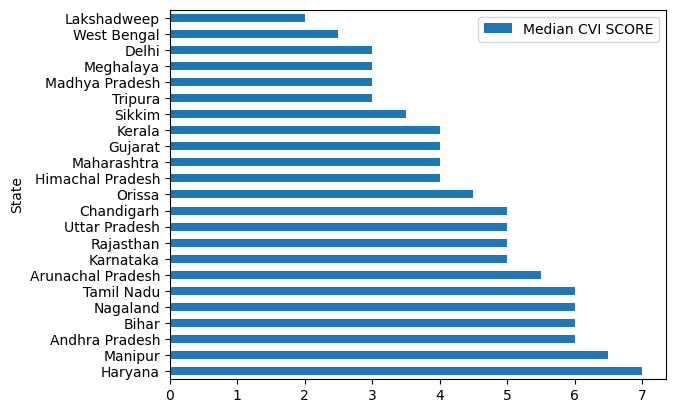

In [16]:
df.groupby('State')[['State', 'CVI SCORE']].agg({
    'CVI SCORE' : 'median'
}).reset_index(names='State').rename(columns= {'CVI SCORE': 'Median CVI SCORE'}).sort_values(by='Median CVI SCORE', ascending=False).plot(kind='barh',
                                                                                                                                          x='State',
                                                                                                                                          y = 'Median CVI SCORE' 
                                                                                                                                          )